# Pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
     

In [60]:
data = pd.read_excel('titanic3.xls')

In [ ]:
df = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv' , delimiter = ',' , lineterminator='\n')

In [ ]:
df = pd.read_csv(filepath_or_buffer="", delimiter=',', lineterminator='\n')

# Description of data

In [5]:
data.shape
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [10]:
data.isna().count()

pclass      1309
survived    1309
sex         1309
age         1309
dtype: int64

In [11]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [12]:
data = data.dropna(axis=0)

In [14]:
data.shape

(1046, 4)

In [ ]:
data = data.fillna(data['age'].mean())

<AxesSubplot: ylabel='Frequency'>

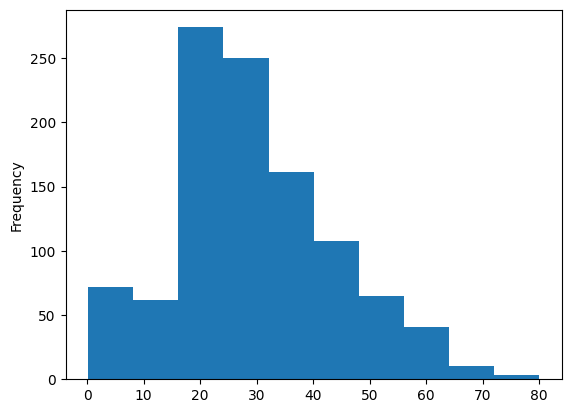

In [16]:
data['age'].plot.hist()

<AxesSubplot: >

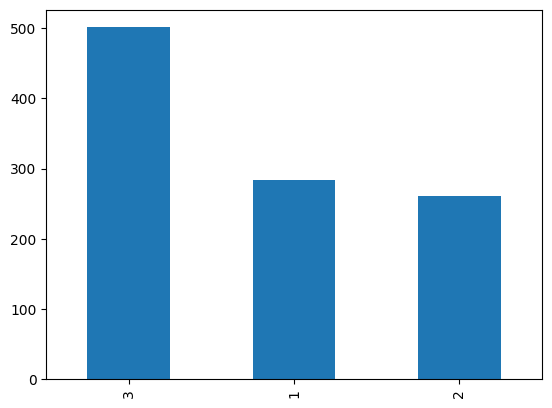

In [20]:
data['pclass'].value_counts().plot.bar()

In [21]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [39]:
def pourcentage(value , total):
    return (value / total) * 100

In [31]:
survived_based_sex = data.groupby(['sex'])['survived'].value_counts()
survived_based_sex

sex     survived
female  1           292
        0            96
male    0           523
        1           135
Name: survived, dtype: int64

In [35]:
female_survived = survived_based_sex.female.sum()
female_survived


388

In [38]:
male_survived = survived_based_sex.male.sum()
male_survived

658

In [45]:
survived = data[data['survived'] == 1]
survived

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
5,1,1,male,48.0000
6,1,1,female,63.0000
8,1,1,female,53.0000
...,...,...,...,...
1261,3,1,female,63.0000
1277,3,1,male,22.0000
1286,3,1,female,38.0000
1290,3,1,female,47.0000


In [47]:
survived_result = survived.value_counts().sum()
survived_result

427

In [49]:
female_survived_perc = pourcentage(female_survived , survived_result)
print(f"{female_survived_perc:.2f}")

90.87


In [50]:
data['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

In [51]:
data['age'][0:10]

/var/folders/99/yjcv_wk14lx2lv2bryyy657m0000gn/T/ipykernel_52723/2410398544.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['age'][0:10]


0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64

In [52]:
data['age']<13

0       False
1        True
2        True
3       False
4       False
        ...  
1301    False
1304    False
1306    False
1307    False
1308    False
Name: age, Length: 1046, dtype: bool

In [53]:
data[data['age']<18]

,pclass,survived,sex,age
1,1,1,male,0.9167
2,1,0,female,2.0000
53,1,0,male,17.0000
54,1,1,male,11.0000
55,1,1,female,14.0000
...,...,...,...,...
1265,3,0,female,10.0000
1275,3,0,male,16.0000
1279,3,0,female,14.0000
1300,3,1,female,15.0000


In [56]:
data = {'Name': ['Jon' , 'Marie'],
        'Age' : ['11 ' , '30']}
df = pd.DataFrame(data)
df

,Name,Age
0,Jon,11
1,Marie,30


In [57]:
data = {'Name': ['Jon' , 'Marie'],
        'Age' : ['11 ' , '30']}
df = pd.DataFrame(data , columns = ['Name' , 'Age'])
df

,Name,Age
0,Jon,11
1,Marie,30


In [67]:
data.iloc[0 : 3 , 1 : 4]

,survived,name,sex
0,1,"Allen, Miss. Elisabeth Walton",female
1,1,"Allison, Master. Hudson Trevor",male
2,0,"Allison, Miss. Helen Loraine",female


In [74]:
data.loc[5 , ['age' , 'pclass']]

age       48.0
pclass       1
Name: 5, dtype: object